In [1]:
from mmot import MMOTSolver

import numpy as np 
import matplotlib.pyplot as plt 
import itertools

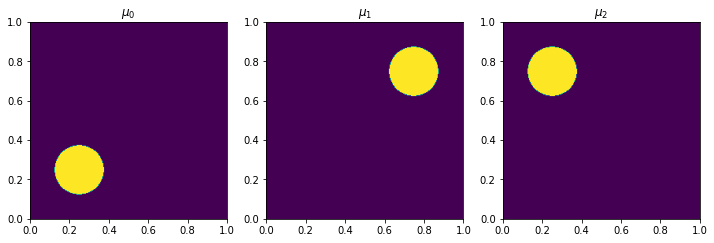

In [2]:
# Grid of size n1 x n2
n1 = 250   # x axis
n2 = 250   # y axis

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

r = 0.125

# positions = np.array([[0.25,0.75],
#                       [0.5, 0.75],
#                       [ 0.55,0.35],
#                       [0.65,0.25]])

positions = np.array([[0.25,0.25],
                      [ 0.75,0.75],
                      [0.25,0.75]])

# measures = [None]*len(positions)
measures = [None]*(len(positions))

for i in range(len(positions)):
    xc,yc = positions[i]
    measures[i] = np.zeros((n2, n1))
    measures[i][(x-xc)**2 + (y-yc)**2 < r**2] = 1

    # Normalize
    measures[i] *= n1*n2 / np.sum(measures[i])

# Plot mu and nu
# fig, ax = plt.subplots(1, len(positions), figsize=(12,4))
# for i in range(len(positions)):
#   ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1))
#   ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i))

fig, ax = plt.subplots(1, len(measures), figsize=(12,4))
for i in range(len(measures)):
    ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1))
    ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i))

0


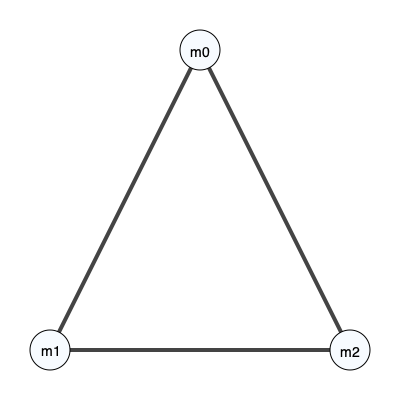

In [3]:
unroll_node = 0

# The set A that defines the pairwise costs
edge_list = [[0,1], [1,2], [0,2]]


prob = MMOTSolver(measures, edge_list, x, y, unroll_node)

prob.Visualize('original', filename='CostGraph.svg')

Iteration, StepSize,    Cost,   Error
        0,   0.0800,  0.1420,   2.41658
        5,   0.0800,  0.4540,   0.66491
       10,   0.0800,  0.4949,   0.04768
       15,   0.0800,  0.4973,   0.02649
       20,   0.0800,  0.4983,   0.04724
       25,   0.0800,  0.4998,   0.03741


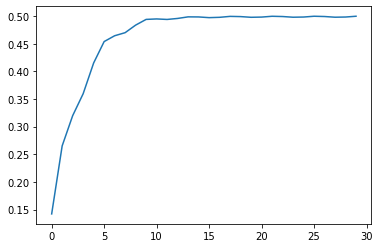

In [4]:
dual_vars = [np.zeros(x.shape) for i in range(prob.NumDual())]

num_its = 30
step_size = 0.08
root_node = 0
costs = np.nan*np.zeros(num_its)

root_nodes = np.arange(prob.NumDual())
root_cycler = itertools.cycle(root_nodes)

print('Iteration, StepSize,    Cost,   Error')
for i in range(num_its):
    error = prob.Step(next(root_cycler), dual_vars, step_size)
    costs[i] = prob.ComputeCost(dual_vars)
    if((i%5)==0):
        print('{:9d},   {:0.4f},  {:0.4f},   {:0.5f}'.format(i,step_size, costs[i], error))

plt.plot(costs)
plt.show()

In [6]:
weights = np.ones(len(measures))/len(measures)
bary = prob.Barycenter(dual_vars, weights)


Text(0.5, 1.0, 'True Barycenter')

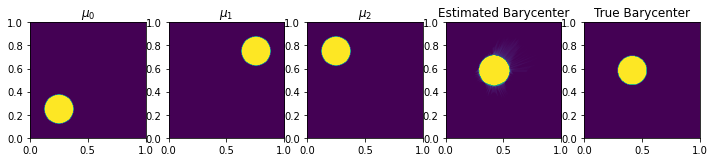

In [13]:
vmax = np.max(measures[0])
fig, axs = plt.subplots(1, len(measures)+2, figsize=(12,4))
for i in range(len(measures)):
    axs[i].imshow(measures[i], origin='lower', extent=(0,1,0,1), vmin=0, vmax=vmax)
    axs[i].set_title("$\\mu_{{ {:0d} }}$".format(i))
    
axs[-2].imshow(bary, origin='lower', extent=(0,1,0,1), vmin=0, vmax=vmax)
axs[-2].set_title('Estimated Barycenter')

true_loc = np.mean(positions,axis=0)
true_bary = np.zeros((n2, n1))
true_bary[(x-true_loc[0])**2 + (y-true_loc[1])**2 < r**2] = 1
true_bary *= n1*n2 / np.sum(true_bary)

axs[-1].imshow(true_bary, origin='lower', extent=(0,1,0,1), vmin=0, vmax=vmax)
axs[-1].set_title('True Barycenter')
